In [1]:
import numpy as np
from lorenz_attractor import LorenzAttractor, visualize
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

In [2]:
%matplotlib notebook

In [4]:
params = {
    'sigma' : 10.,
    'rho'   : 28.,
    'beta'  : 8./3.,
    't_init': 0,
    't_finish':20,
    'n_steps':10001
}

In [19]:
init_state = np.array([1., 1., 1.], dtype=float)
a1 = LorenzAttractor(params, init_state)
sol1 = a1.simulate()

a2 = LorenzAttractor(params, init_state)
sol2 = a2.simulate_stochastic()

<IPython.core.display.Javascript object>


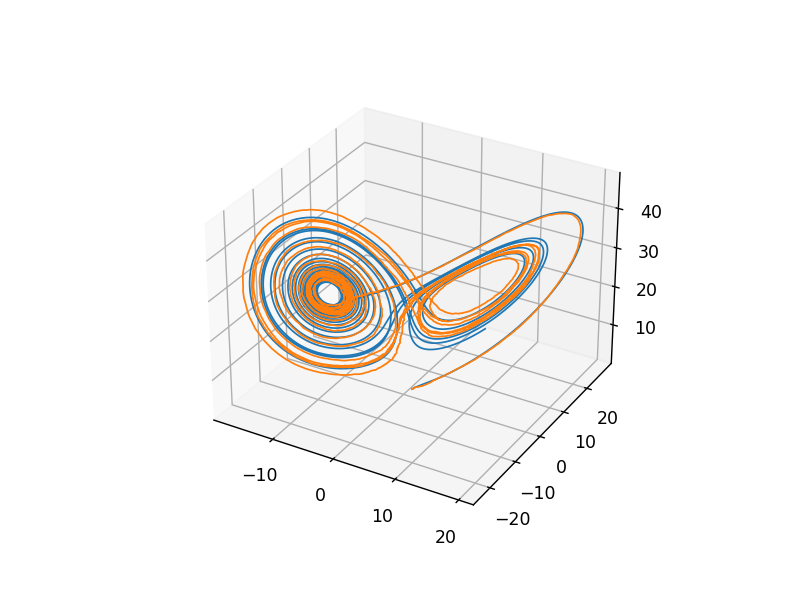

In [20]:
visualize([sol1, sol2])

### Try Naive Bayes

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import copy
from tqdm.notebook import tqdm

In [4]:
# Generate dataset
params = {
    'sigma' : 10.,
    'rho'   : 28.,
    'beta'  : 8./3.,
    't_init': 0,
    't_finish':20,
    'n_steps':10001
}

# in order: sigma, rho, beta
srb_dispersion = np.array([1., 1., 1./3.], dtype=float)

init_state = np.array([1., 1., 1.], dtype=float)

N = 100
data = []
for i in tqdm(range(N)):
    srb_delta = np.random.random(3) * srb_dispersion - srb_dispersion
    params_dispersed = copy.deepcopy(params)
    params_dispersed['sigma'] += srb_delta[0]
    params_dispersed['rho'] += srb_delta[1]
    params_dispersed['beta'] += srb_delta[2]
    
    sys_dispersed = LorenzAttractor(params_dispersed, init_state)
    sys_soln = sys_dispersed.simulate_stochastic()
    if np.any(np.isnan(sys_soln[-1])):
        print("Overflow error at step {}, skipping...".format(i))
        continue
    
    data.append([np.array([params_dispersed['sigma'],
                           params_dispersed['rho'],
                           params_dispersed['beta']]),
                 sys_soln])

  0%|          | 0/100 [00:00<?, ?it/s]

[INFO] Visualizing 100 trajectories.


<IPython.core.display.Javascript object>


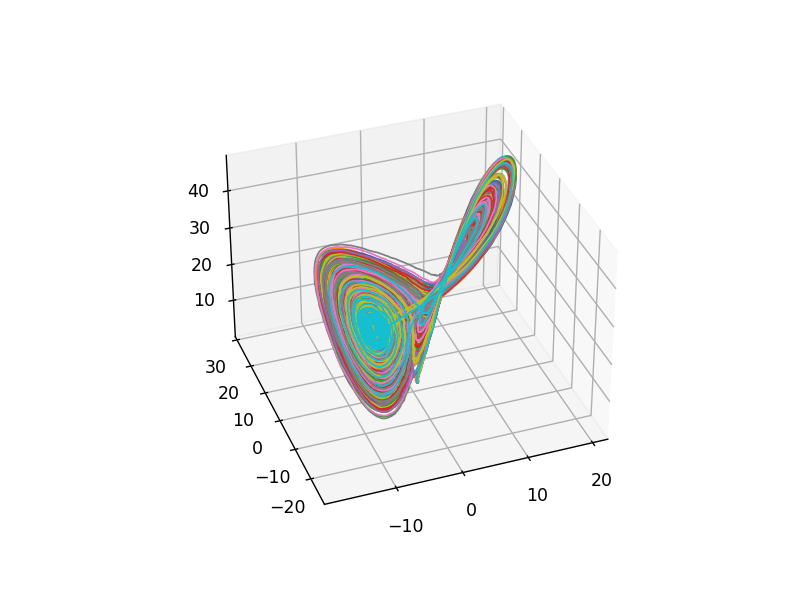

In [5]:
print("[INFO] Visualizing {} trajectories.".format(len(data)))
visualize(d[1] for d in data)

In [3]:
system = LorenzAttractor(params, init_state)

res = system.skopt_f([10., 28., 8./3])

NameError: name 'params' is not defined

In [5]:
res

array([ -6.02446801,  -8.78961071, 104.64363003])

In [ ]:
# Use gp_minimize
from skopt import gp_minimize

params = {
    'sigma' : 10.,
    'rho'   : 28.,
    'beta'  : 8./3.,
    't_init': 0,
    't_finish':20,
    'n_steps':10001
}

# in order: sigma, rho, beta
srb_dispersion = np.array([2., 2., 2./3.], dtype=float)

init_state = np.array([1., 1., 1.], dtype=float)

system = LorenzAttractor(params, init_state)

res = gp_minimize(
    system.skopt_f,
    [
        (params['sigma'] - srb_dispersion[0], params['sigma'] + srb_dispersion[0]),
        (params['rho'] - srb_dispersion[1], params['rho'] + srb_dispersion[1]),
        (params['beta'] - srb_dispersion[2], params['beta'] + srb_dispersion[2])
    ],
    acq_func='EI',
    n_calls=20
)

In [14]:
# Print results
print(res)

          fun: -9.13560147815398
    func_vals: array([185.15797848, 139.14871251,  73.73610342, 122.66394204,
        64.56730698,  97.35213109,  96.11257703, 128.79812909,
        49.51950267,  56.31679603, 111.15436605, 114.6994914 ,
        -9.13560148,  97.64004937,  69.36716612, 111.41301216,
        81.8378762 ,  70.13018593,  77.95193507, 123.31120955,
       134.99404495,  93.34729098,  86.21890961,  83.52681245,
       137.94086761, 109.8617448 , 136.88130623, 141.11849304,
       121.30598259,  92.33901965,  89.38385688,  23.71499904,
       118.93979157,  82.89610478, 170.7675573 ,  77.26497227,
        83.50654743, 123.3589398 ,  80.11764678,  52.52902749,
       252.52343866, 123.94928072,  70.07392159, 111.5332187 ,
        43.03915818,  94.1376991 ,  89.23888139, 112.96299868,
       108.54801655, 165.33088623])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=[1, 1, 1], nu=2.5) + WhiteKernel(noise_level=1),
                         n_restarts_

<IPython.core.display.Javascript object>


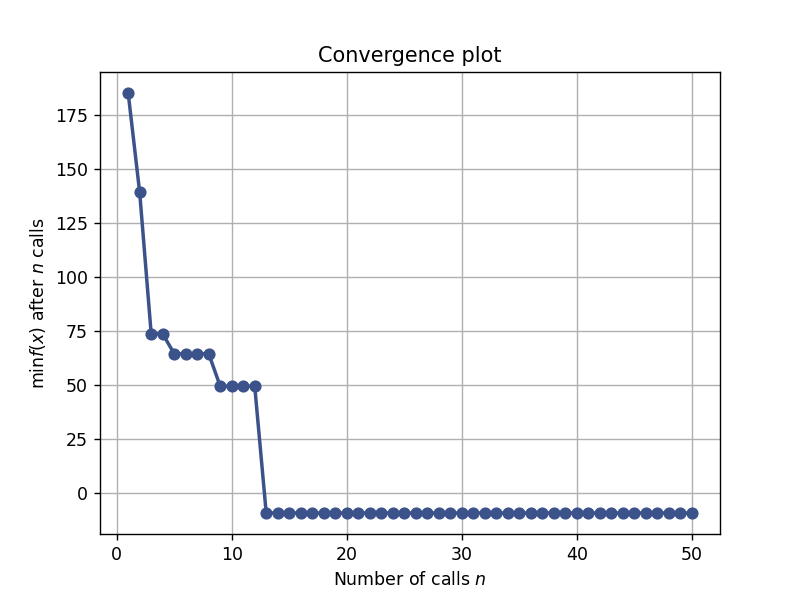

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

In [15]:
# Visualize convergence
from skopt.plots import plot_convergence
plot_convergence(res)

In [11]:
# Use GaussianNB

X = np.array([d[0] for d in data])
Y = np.array([d[1].flatten() for d in data])

classifier = GaussianNB()
classifier.fit(X, Y)

ValueError: y should be a 1d array, got an array of shape (100, 30003) instead.